In [1]:
#Defining a fuction and plotting it


import math
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
def f(x):
    return 3*x**2 -4*x +5

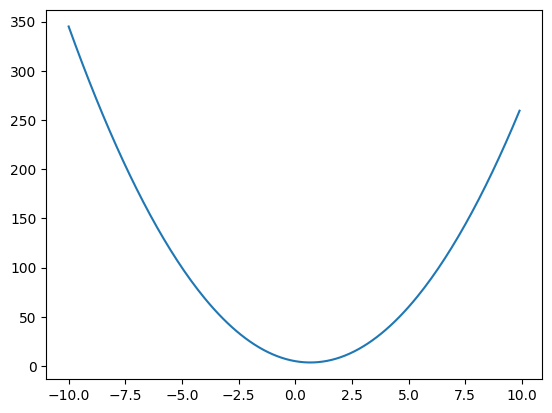

In [4]:
xs = np.arange(-10,10,0.1)
ys = f(xs)
plt.plot(xs, ys)
plt.show()

In [8]:
#Slope of the function at a point
h = 0.000001
x = 3.0
(f(x+h)-f(x))/h

14.000003002223593

In [19]:
#Defining the class - Value


class Value:
    def __init__(self, data, _children = (), _op = '', label = ''):
        self.data = data
        self.grad = 0.0
        self._prev = set(_children)
        self._op = _op
        self.label = label
    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self,other):
        return Value(self.data + other.data, (self, other), '+')
    
    def __mul__(self,other):
        return Value(self.data* other.data, (self, other), '*')

In [20]:
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a*b; e.label='e'
#a.__add__(b)
d = e + c; d.label='d'
f = Value(-2.0, label='f')
L = d * f; L.label='L'

L

Value(data=-8.0)

In [19]:
d._prev, d._op

({Value(data=-6.0), Value(data=10.0)}, '+')

In [23]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
# Visualizing the forward pass

from graphviz import Digraph

def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root, format='svg', rankdir='LR'):
    """
    format: png | svg | ...
    rankdir: TB (top to bottom graph) | LR (left to right)
    """
    assert rankdir in ['LR', 'TB']
    nodes, edges = trace(root)
    dot = Digraph(format=format, graph_attr={'rankdir': rankdir}) #, node_attr={'rankdir': 'TB'})
    
    for n in nodes:
        dot.node(name=str(id(n)), label = "{ data %.4f | grad %.4f }" % (n.data, n.grad), shape='record')
        if n._op:
            dot.node(name=str(id(n)) + n._op, label=n._op)
            dot.edge(str(id(n)) + n._op, str(id(n)))
    
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    
    return dot

In [25]:
draw_dot(L)

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [13]:
#Manual backpropagation

def lol():
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a*b; e.label='e'
    #a.__add__(b)
    d = e + c; d.label='d'
    f = Value(-2.0, label='f')
    L1 = d * f; L.label='L'

    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a*b; e.label='e'
    #a.__add__(b)
    d = e + c; d.label='d'
    f = Value(-2.0, label='f')
    L2 = d * f; L.label='L'

    L = L2-L1
    return L



In [15]:
L.grad = 1.0 #dL/dL = 1
f.grad = 4.0 #grad value is data value of d #dL/df = d
d.grad = -2.0 #same dL/dd = f
e.grad = -2.0 #dL/de = f * 1
a.grad = 6.0 #dL/da = f * b
b.grad = -4.0 #dL/db = f * a